<a href="https://colab.research.google.com/github/engom/My_Codes_Dsti/blob/main/linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part A: Build a linear model

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# load the whole diabetes dataset and separate x and y
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)
# check the shape 
diabetes_x.shape

(442, 10)

In [21]:
# check the length (it's a vector)
len(diabetes_y)

442

In [22]:
# Use only one feature
diabetes_x = diabetes_x[:, np.newaxis, 2]
diabetes_x.shape

(442, 1)

In [23]:
# plit x to get x_train and chose 8 columns 
diabetes_x_train = diabetes_x[:-20] # leave out 20 last rows
print(diabetes_x_train.shape)

# get x_test and coose 8 columns
diabetes_x_test = diabetes_x[-20:] # take only last 20 rows
print(diabetes_x_test.shape)

(422, 1)
(20, 1)


In [24]:
# split y to get y_train
diabetes_y_train = diabetes_y[:-20] # leave out 20 last rows
print(len(diabetes_y_train))
# get y_test
diabetes_y_test = diabetes_y[-20:] # take only last 20 rows
print(len(diabetes_y_test))

422
20


In [25]:
# instanciate the model
lin_reg = linear_model.LinearRegression()

# train
lin_reg.fit(diabetes_x_train, diabetes_y_train)

LinearRegression()

In [26]:
# predict on x_test
y_pred = lin_reg.predict(diabetes_x_test)

In [27]:
# get mean square error
print(f"The rooted mean square error of the model mse= {np.sqrt(mean_squared_error(diabetes_y_test, y_pred))}")

The rooted mean square error of the model mse= 50.478434986892864


In [28]:
# get coef de determinattion r2_score
print(f"The coefficient of determination r2_score = {r2_score(diabetes_y_test, y_pred)}")

The coefficient of determination r2_score = 0.47257544798227147


In [29]:
# get the intercep = b0
lin_reg.intercept_

152.91886182616167

In [30]:
# get coefficientc (b1, ...., b4)
lin_reg.coef_

array([938.23786125])

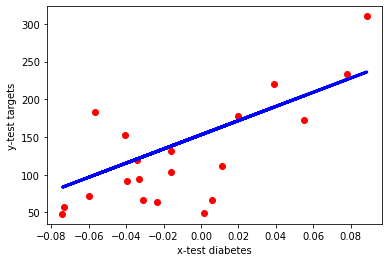

In [31]:
plt.scatter(diabetes_x_test, diabetes_y_test, color="red")
plt.plot(diabetes_x_test, y_pred, color="blue", linewidth=3)
plt.xlabel("x-test diabetes")
plt.ylabel("y-test targets")
plt.show()

In [32]:
# slicing stategy used above explaned here
a = [2, 1, 0, 5] # list or array-list
print(f'Get all except the last 2 : {a[:-2]}') # get all except last :-n here n=2
print(f'Get only the last item : {a[-1]}')  # get the last item of list or array-list

Get all except the last 2 : [2, 1]
Get only the last item : 5


In [33]:
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784', version=1, cache=True)
#mnist.data.shape # or mnist['data'].shape

# Part B: MLFLOW to experiment the number of features used in the model

In [34]:
!pip install mlflow

     |████████████████████████████████| 16.5 MB 238 kB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 596 kB 48.1 MB/s 
     |████████████████████████████████| 181 kB 41.0 MB/s 
     |████████████████████████████████| 146 kB 45.1 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
     |████████████████████████████████| 210 kB 44.8 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 78 kB 6.3 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.16.4-py3-none-any.whl size=106877 sha256=fe23384ac8dbe0b6c6f13293d670cce583bbe63527f08f529f8cde3d51fe5f60
  Stored in directory: /root/.cache/pip/wheels/a2/a1/6d/fa1d22ea25ed8593887437fe1c7e00f6ef307fc240ccd4dc5c
Successfully built databricks-cli
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfu

In [35]:
import mlflow
import logging
import warnings
#import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
def run_train(n=5, test_size=0.2):
  # Added experiment name
  mlflow.set_experiment('experiment_lin_reg')

  logging.basicConfig(level=logging.WARN)
  logger = logging.getLogger(__name__)

  def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

  #warnings.filterwarnings("ignore")
  np.random.seed(50)

  # load the whole diabetes dataset and separate x and y
  diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)

  # Use only one feature by default or the n first colums as x_data
  if n == None:
    diabetes_x = diabetes_x[:, np.newaxis, 2]
    n = 1
  else:
    diabetes_x = diabetes_x[:, 0:n]

  # plit train test 
  x_train, x_test, y_train, y_test = train_test_split(diabetes_x, diabetes_y, test_size=test_size)

  # Useful for multiple runs (only doing one run in this sample notebook)    
  with mlflow.start_run():
    # instanciate the linear model
    lin_reg = LinearRegression()

    # train it 
    lin_reg.fit(x_train, y_train)

    # predict 
    y_pred = lin_reg.predict(x_test)
    # Evaluate Metrics
    (rmse, mae, r2) = eval_metrics(y_test, y_pred)

    # Print out metrics
    print("Linear model with %d column(s) in the data" % (n))
    print('')
    print("  RMSE: %s" % rmse)
    print('')
    print("  MAE: %s" % mae)
    print('')
    print("  R2: %s" % r2)
   
    # Log parameter, metrics
    mlflow.log_param("number of colums used", n)
    mlflow.log_param("test_size", test_size)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    #  and model to MLflow
    mlflow.sklearn.log_model(lin_reg, "model")
  

In [37]:
# param: n number of features and test_size ratio
run_train(n=9, test_size=np.round(20/422, 2))

2022/03/26 18:43:31 INFO mlflow.tracking.fluent: Experiment with name 'experiment_lin_reg' does not exist. Creating a new experiment.


Linear model with 9 column(s) in the data

  RMSE: 35.2038708960983

  MAE: 29.791527756066845

  R2: 0.6404909846464311


In [39]:
# add one column at each run
for n in range(1,10):
  run_train(n, test_size=np.round(22/422, 2))

Linear model with 1 column(s) in the data

  RMSE: 69.48574118942092

  MAE: 62.847275545095975

  R2: -0.4006200375042206
Linear model with 2 column(s) in the data

  RMSE: 69.44494643449833

  MAE: 62.836884278981664

  R2: -0.39897592527401615
Linear model with 3 column(s) in the data

  RMSE: 46.85821600433537

  MAE: 37.948508418135354

  R2: 0.36305717993283826
Linear model with 4 column(s) in the data

  RMSE: 42.50632006600793

  MAE: 36.897949801646796

  R2: 0.4758736880819473
Linear model with 5 column(s) in the data

  RMSE: 42.995523907169805

  MAE: 37.64911308057658

  R2: 0.46373995922789923
Linear model with 6 column(s) in the data

  RMSE: 43.5481972229633

  MAE: 37.77809376864048

  R2: 0.44986495872708754
Linear model with 7 column(s) in the data

  RMSE: 35.942305605176166

  MAE: 30.71118989711297

  R2: 0.6252507163119084
Linear model with 8 column(s) in the data

  RMSE: 36.127431936660855

  MAE: 31.179574537942006

  R2: 0.6213803677251466
Linear model with 9

In [40]:
#!mlflow ui

In [41]:
# get x_test of 20 rows as in the first part.
np.round(20/422, 2) # test_size in part A

0.05